<a href="https://colab.research.google.com/github/AshishRaj04/Ashish-Raj-dot-com/blob/master/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Dataset/Housing.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
data = data.drop(columns = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"])

In [6]:
features = data.columns

In [7]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [8]:
data_array = data.to_numpy()

In [9]:
X_train = data_array[:, 1:]
y_train = data_array[:, 0]

In [10]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (545, 5), X Type:<class 'numpy.ndarray'>)
y Shape: (545,), y Type:<class 'numpy.ndarray'>)


# Plot required for **feature engineering**

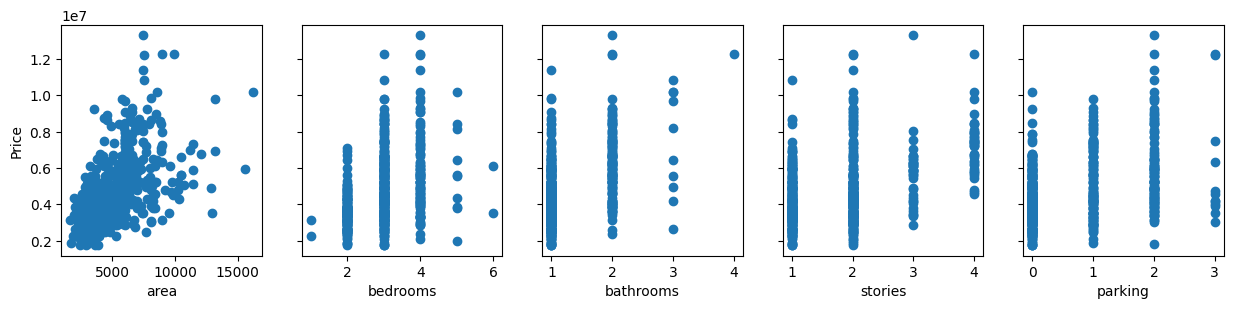

In [11]:
fig,ax=plt.subplots(1, 5, figsize=(15, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(features[i+1])
ax[0].set_ylabel("Price")
plt.show()

# Plot for **Decision Boundary**

In [12]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

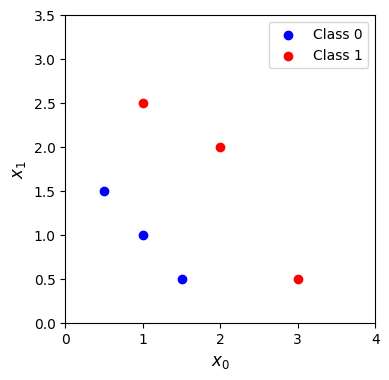

In [13]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0],c='blue', marker='o', label='Class 0')
ax.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],c='red', marker='o', label='Class 1')
ax.axis([0, 4, 0, 3.5]) # not necessary to provide
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend()
plt.show()

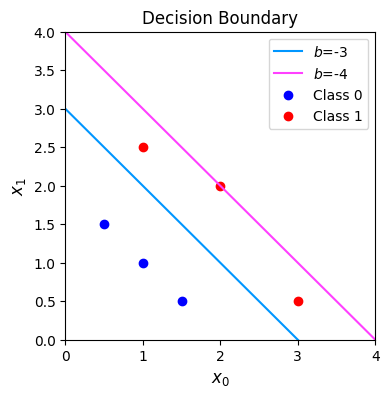

In [14]:
dlc = {"dlblue": "#0096ff", "dlorange": "#FF9300", "dldarkred": "#C00000", "dlmagenta": "#FF40FF", "dlpurple": "#7030A0"}
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c=dlc["dlblue"], label="$b$=-3")
ax.plot(x0,x1_other, c=dlc["dlmagenta"], label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
ax.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0],c='blue', marker='o', label='Class 0')
ax.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],c='red', marker='o', label='Class 1')
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [15]:
w = np.array([0.6 , 0.8])
b = -8.32
# The weight is random and not the trained .

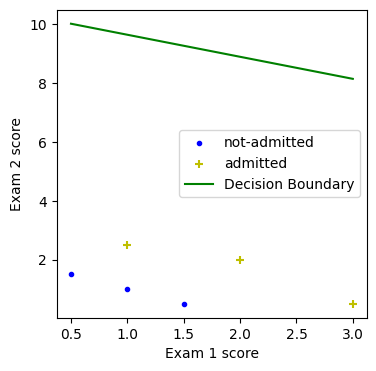

In [16]:
fig , ax = plt.subplots(1,1,figsize = (4,4))
ax.scatter(X_train[:,0][y_train==0] , X_train[:,1][y_train==0] , c = "b" , marker = "." , label = "not-admitted")
ax.scatter(X_train[:,0][y_train==1] , X_train[:,1][y_train==1] , c = "y" , marker = "+" , label = "admitted")
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")

x_boundary = np.array([np.min(X_train[:, 0]), np.max(X_train[:, 0])]) # x[0] = [min , max]
y_boundary = -(b + w[0] * x_boundary)/w[1] # x[1] = -(b + w[0] * x[0]) / w[1]
ax.plot(x_boundary , y_boundary , c = "g", label = 'Decision Boundary')
ax.legend(loc=0)
plt.show()

# Code for saving a plot as a ***.png*** in g-drive

In [20]:
from pathlib import Path

IMAGE_PATH = Path() / "images" / "plots"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# Plot for **histogram**

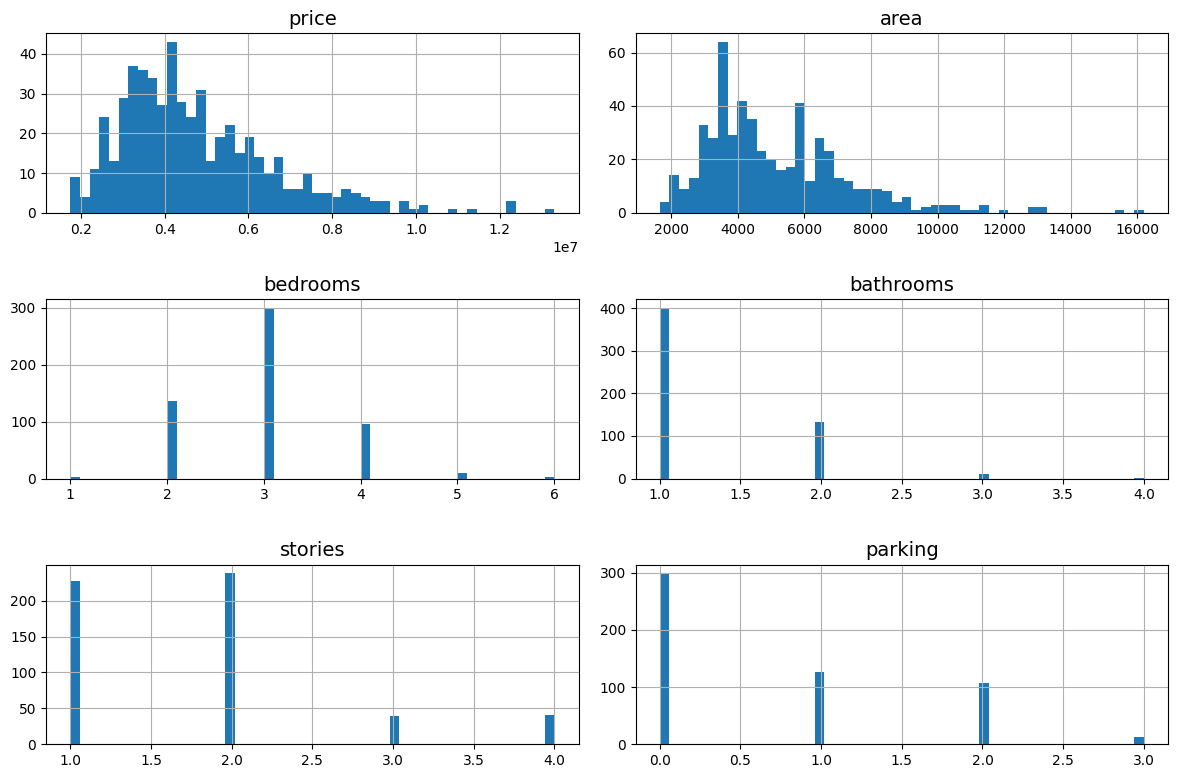

In [21]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
data.hist(bins=50, figsize=(12,8))
save_fig("attribute_histogram_plots") # for saving the plots
plt.show()